# **Project of Neural Networks - Bank Churn Prediction**

**Author: Pablo Ulises Hernandez Garces**

**link Github: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-UlisesHdzG**

## Objective
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.

## Context
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of
service, keeping in mind these priorities.

## Data Description
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore,
Geography, Gender, Age, Tenure, Balance etc. 

Link to the Kaggle project site:

https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


1. **Read the dataset**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
project_path = '/content/drive/My Drive/AIML/Project 6 - Neural Networks/Data/'
dataset_file = project_path + 'bank.csv'
data = pd.read_csv(dataset_file)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


2. **Drop the columns which are unique for all users like IDs (5 points)**

I will drop RowNumber, CustomerId and Surname because they are unique for each user (the variable Surname has 2932 unique values but this variable does not provide info to the analysis)

In [7]:
data = data.drop(["RowNumber","CustomerId","Surname"],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3. **Distinguish the features and target variable (5 points)**

The variable Exited is the objective variable. The rest of the variables will be considered as features that help me to predict the exit of the costumers. 

I will do some exploratory data analysis in order to understand better the dataset.

In [8]:
# are there duplicated rows?
print("Number of duplicated rows:")
print(data[data.duplicated()].shape[0])

print("Percentage of duplicated rows:")
print(round(data[data.duplicated()].shape[0]/data.shape[0]*100,2))

# number of unique values in each variable
data.nunique()

Number of duplicated rows:
0
Percentage of duplicated rows:
0.0


CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

We can see that there is no duplicated values. Also, we can notice that some variables are categorical such as Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember and Exited. The rest of them could be considered as continous.

In [9]:
# I will convert Geography to numeric class
print(data.Geography.unique())
data['Geography'] = data['Geography'].map(lambda x: ({'France':1, 'Spain':2, 'Germany':3}.get(x)))
data['Gender'] = data['Gender'].map(lambda x: ({'Female':0, 'Male':1}.get(x)))
data.head()

['France' 'Spain' 'Germany']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Skewness
print(data.skew())

#Now let's check basic statistics of the variables.

data.describe().T

CreditScore       -0.071607
Geography          0.495040
Gender            -0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,1.749500,0.830433,1.00,1.00,1.000,3.0000,3.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


We can observe that the skewness of each variable is low.

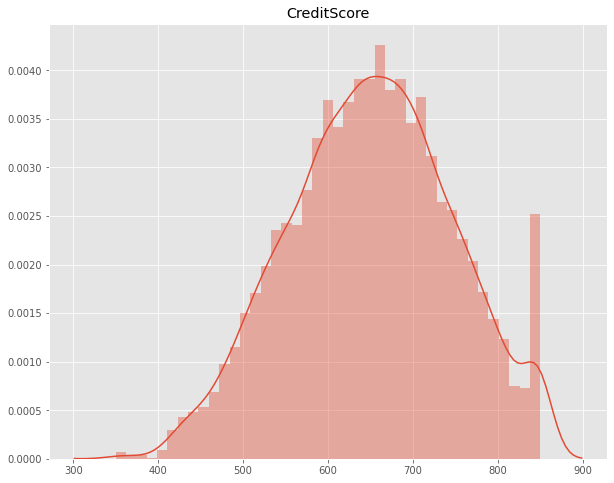

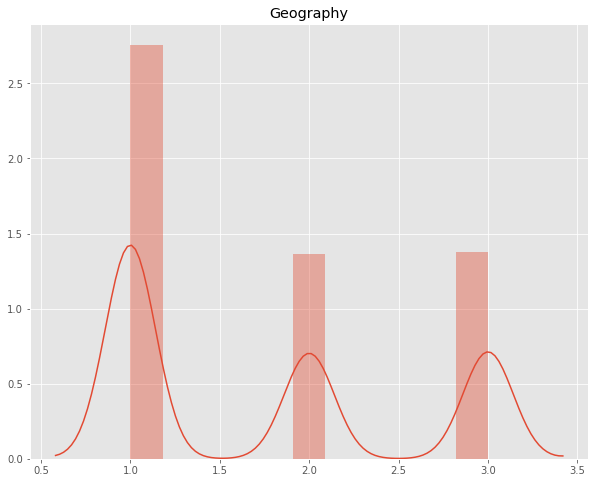

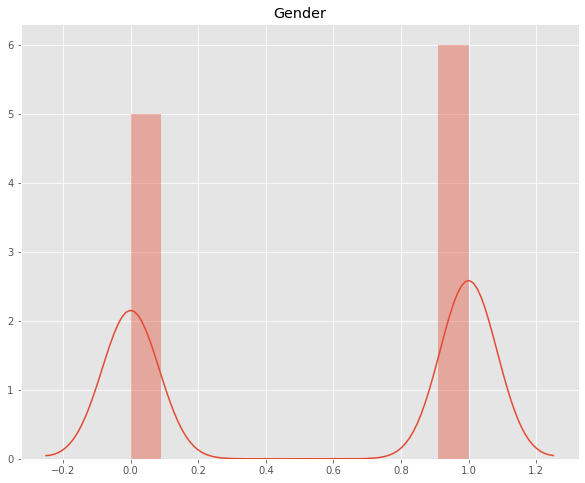

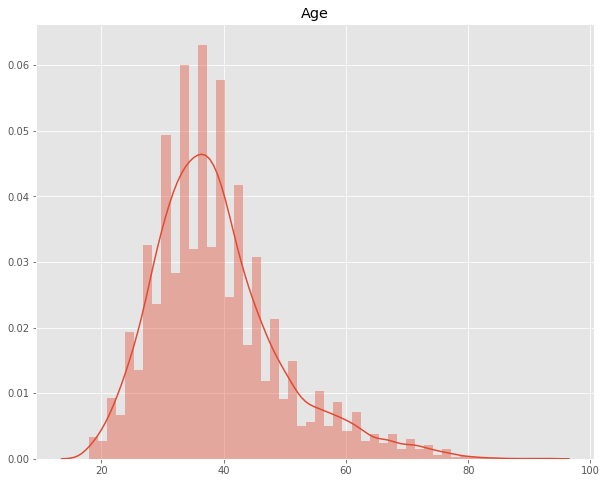

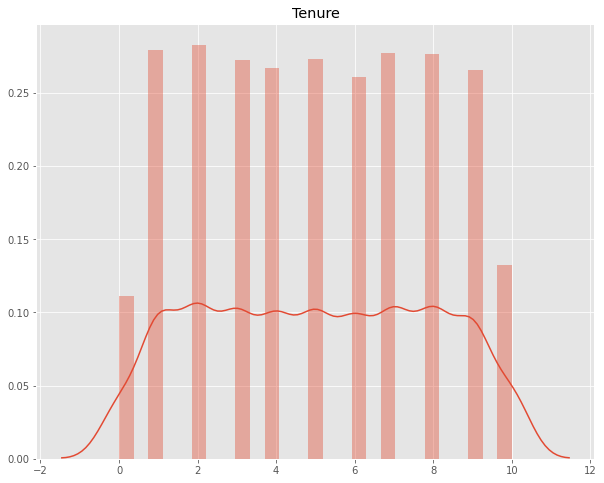

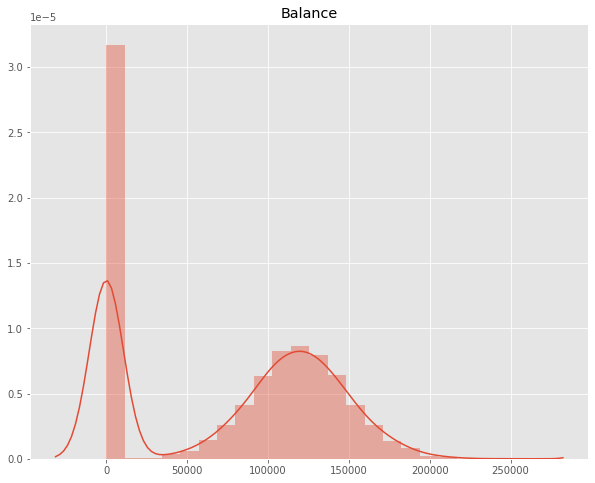

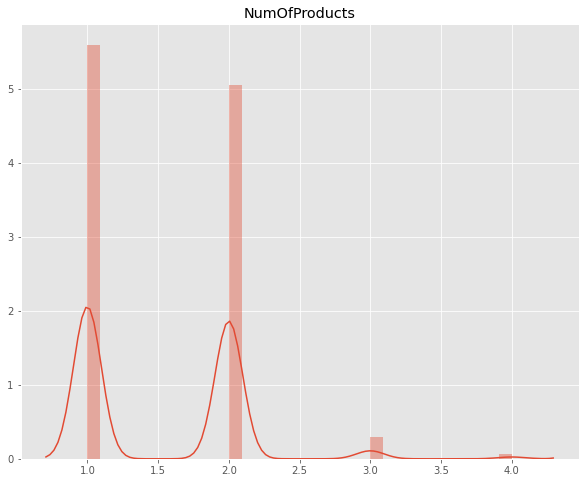

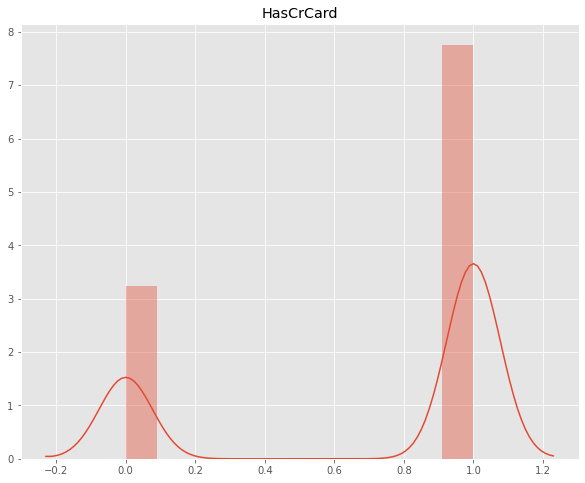

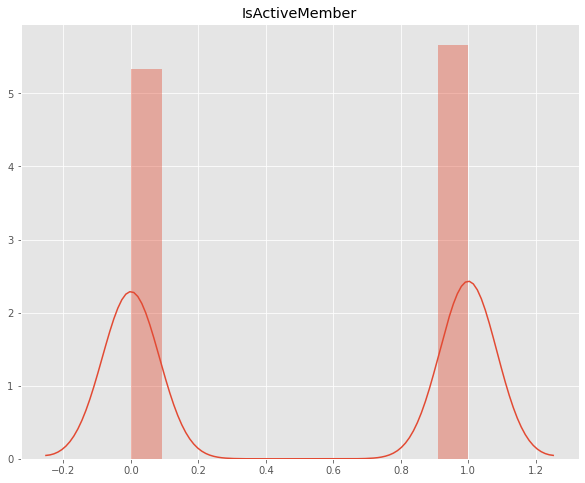

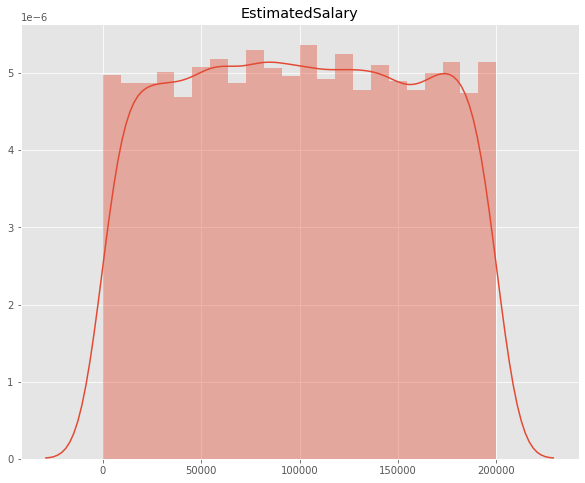

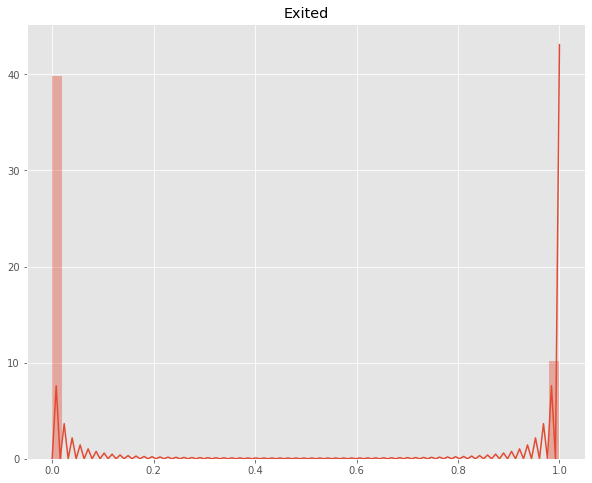

In [11]:
# Univariate plots

# plots for continous variables
for i in data.columns:
    sns.distplot(data[[i]],kde=True)
    plt.title(i)
    plt.show()

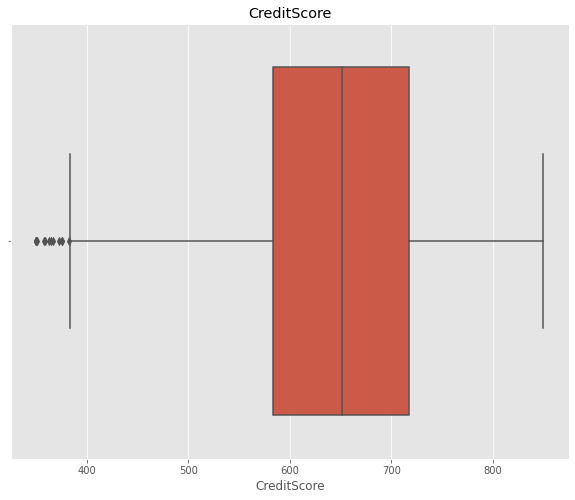

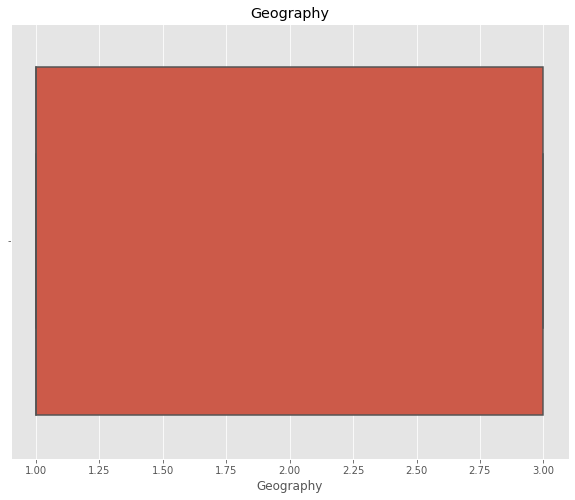

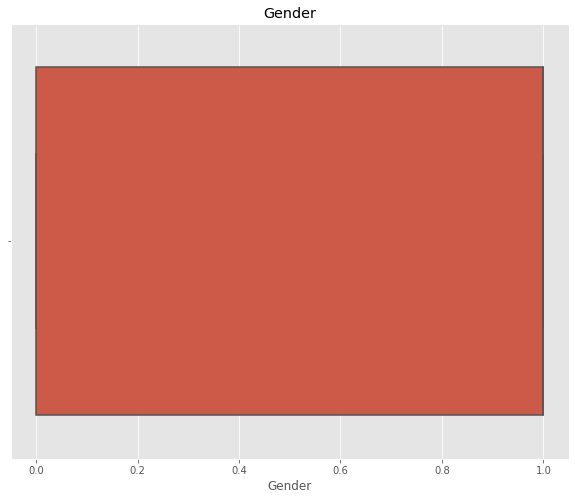

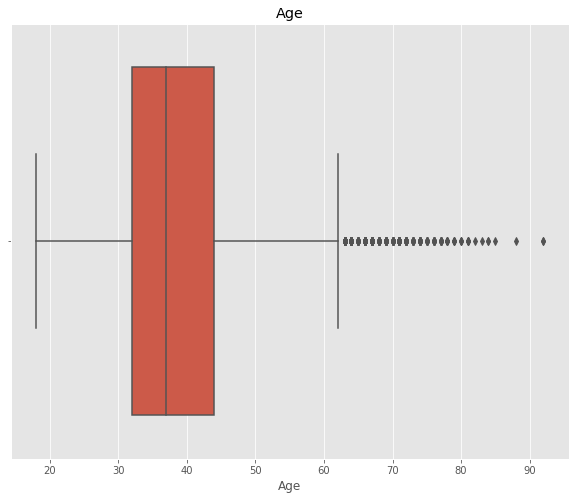

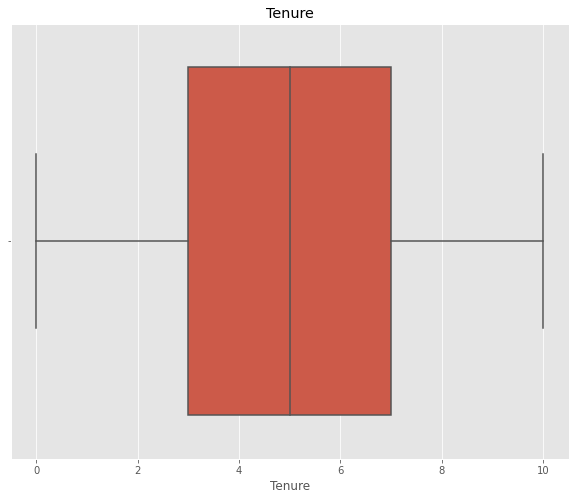

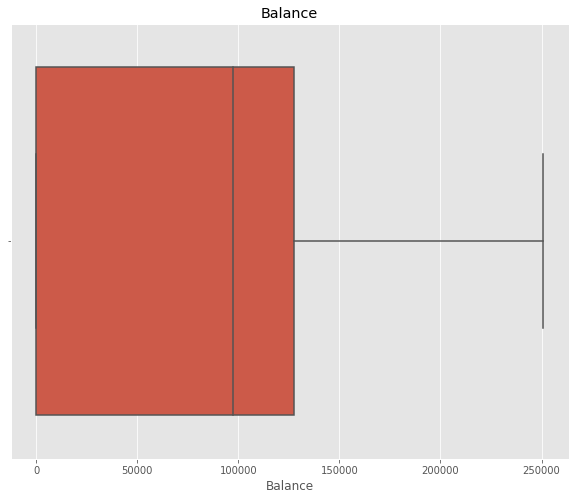

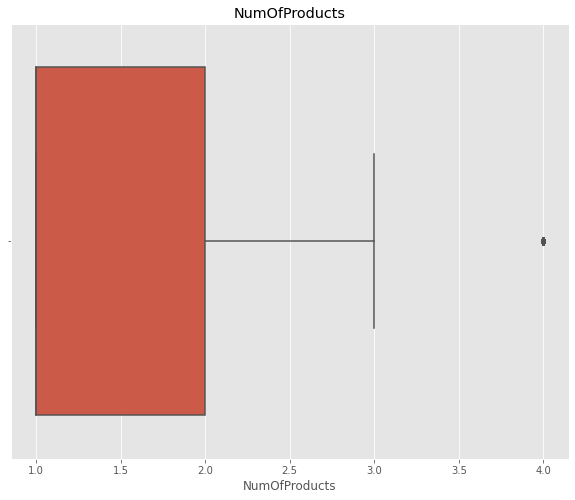

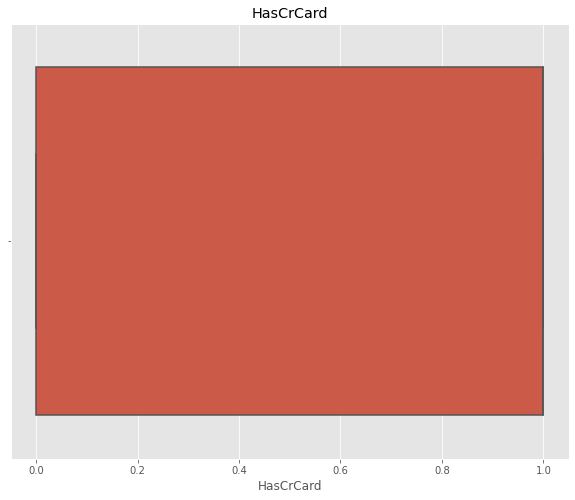

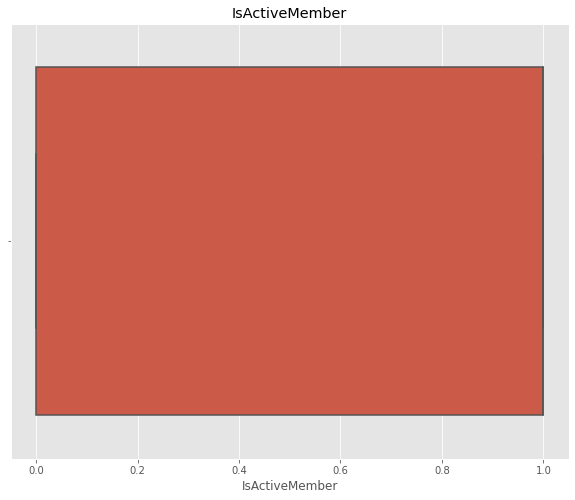

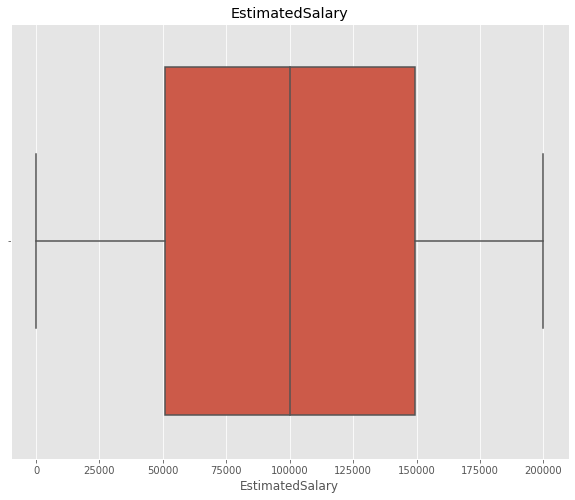

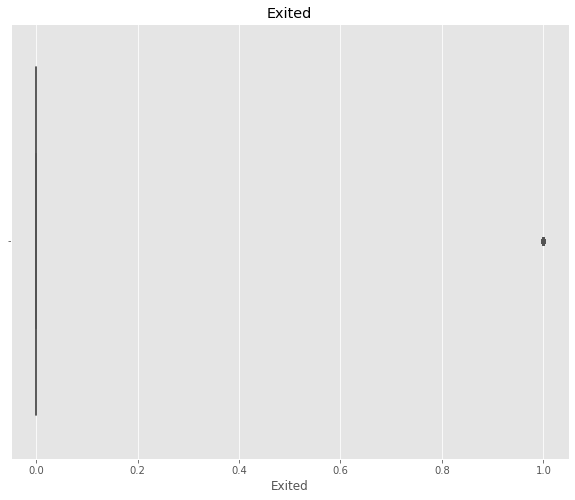

In [12]:
# Finally, we check outliers through boxplots
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [13]:
# proportion of outliers in each variable
print('Number and percentage of outliers per variable\n')
for i in data.columns:
    IQR= np.percentile(data[i],75) - np.percentile(data[i],25)
    t_q = np.percentile(data[i],75)
    # let´s count how many observations exceeds 3Quartile + 1.5*IQR
    res=sum(data[i]>(t_q + 1.5*IQR))
    perc = round(res/data[i].shape[0]*100,2)
    print(i,":",res,'|',perc)

Number and percentage of outliers per variable

CreditScore : 0 | 0.0
Geography : 0 | 0.0
Gender : 0 | 0.0
Age : 359 | 3.59
Tenure : 0 | 0.0
Balance : 0 | 0.0
NumOfProducts : 60 | 0.6
HasCrCard : 0 | 0.0
IsActiveMember : 0 | 0.0
EstimatedSalary : 0 | 0.0
Exited : 2037 | 20.37


**Bivariate Analysis**

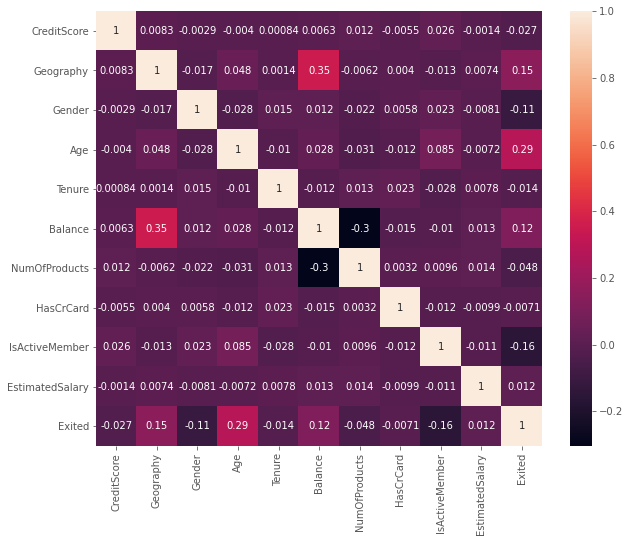

In [14]:
# Correlation between variables
sns.heatmap(data.corr(),annot=True)

There are no strong correlation between variables.

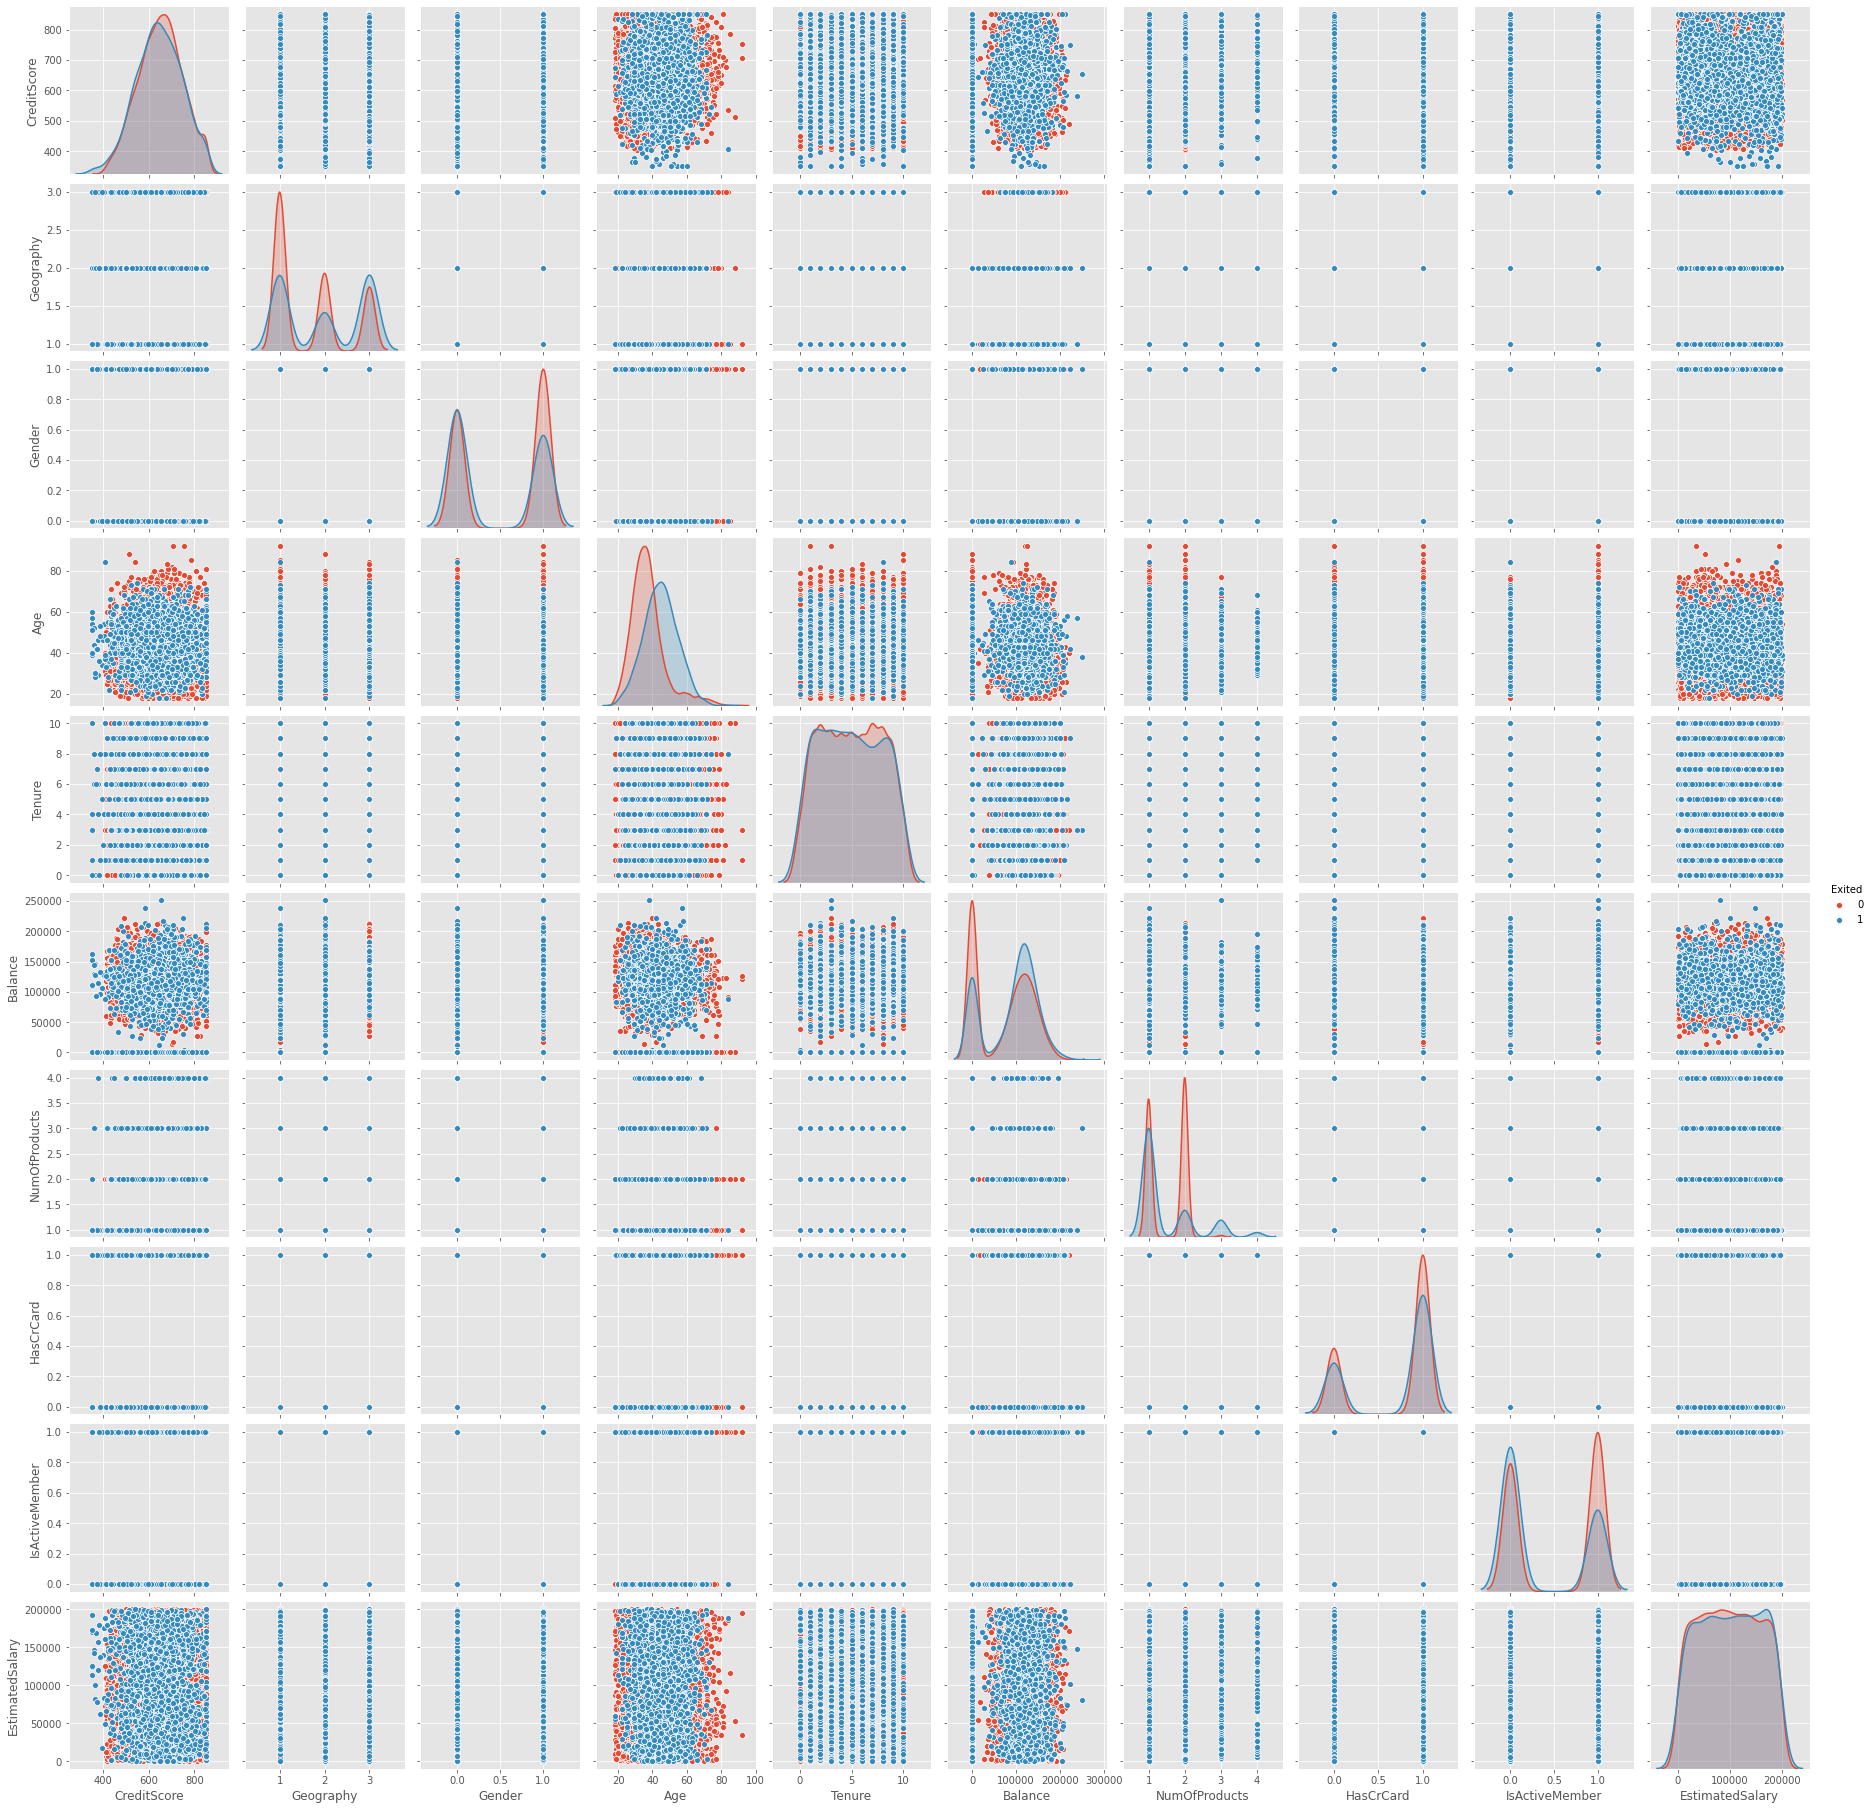

In [15]:
# plotting continuous variables using pairplot
sns.pairplot(data,diag_kind="kde",hue="Exited")

There is no clear division in the plots of each variable

In [16]:
# Passing Geography to One-hot encoding to remove the order
data = pd.get_dummies(data, columns=['Geography'],  drop_first=True)

In [17]:
X_data = data.drop(["Exited"],axis=1)
y_data = data["Exited"].values

In [18]:
X_data.head()
X_dat = X_data.copy()

4. **Divide the data set into training and test sets (5 points)**

I will take 20% of the data for testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)


5. **Normalize the train and test data (10 points)**

In [20]:
X_dat.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_2,Geography_3
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,1,0


For normalize I will use StandardScaler.

In [21]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

6. **Initialize & build the model. Identify the points of improvement and implement the same the same.(20)**

I will create an initial model considering 3 hidden layers and 12 neurons per layer.

In [22]:
# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(12, input_shape = (X_train.shape[1],), activation = 'relu'))

# second hidden layer
model.add(Dense(12, activation = 'relu'))

# third hidden layer
model.add(Dense(12, activation = 'relu'))

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
# We are interested in the cutomers who left the bank (positives), so the metric I will use is Recall: Out of all true positives how many I predict well
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________


I fit the model and save the history to plot it. I will consider 10% for validation

In [25]:
# training the model
history = model.fit(X_train, y_train, batch_size=100, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.6169 - accuracy: 0.7486 - val_loss: 0.5686 - val_accuracy: 0.8000
Epoch 2/200
72/72 - 0s - loss: 0.5473 - accuracy: 0.7961 - val_loss: 0.5206 - val_accuracy: 0.8025
Epoch 3/200
72/72 - 0s - loss: 0.5163 - accuracy: 0.7961 - val_loss: 0.4998 - val_accuracy: 0.8025
Epoch 4/200
72/72 - 0s - loss: 0.5028 - accuracy: 0.7961 - val_loss: 0.4909 - val_accuracy: 0.8025
Epoch 5/200
72/72 - 0s - loss: 0.4959 - accuracy: 0.7961 - val_loss: 0.4855 - val_accuracy: 0.8025
Epoch 6/200
72/72 - 0s - loss: 0.4911 - accuracy: 0.7961 - val_loss: 0.4817 - val_accuracy: 0.8025
Epoch 7/200
72/72 - 0s - loss: 0.4873 - accuracy: 0.7961 - val_loss: 0.4786 - val_accuracy: 0.8025
Epoch 8/200
72/72 - 0s - loss: 0.4840 - accuracy: 0.7961 - val_loss: 0.4758 - val_accuracy: 0.8025
Epoch 9/200
72/72 - 0s - loss: 0.4809 - accuracy: 0.7961 - val_loss: 0.4732 - val_accuracy: 0.8025
Epoch 10/200
72/72 - 0s - loss: 0.4781 - accuracy: 0.7961 - val_loss: 0.4708 - val_accuracy: 0.8025
Epoch 11/

In [26]:
results = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8570


In [27]:
y_pred_1st = model.predict(X_test)
y_pred_1st = (y_pred_1st > 0.5).astype(int)
cm_1st = confusion_matrix(y_test, y_pred_1st)
print(cm_1st)


[[1522   67]
 [ 219  192]]


In [29]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
63/63 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8570
Accuracy Model: 0.8569999933242798
Recall_score: 0.46715328467153283
Precision_score: 0.7413127413127413
F-score: 0.5731343283582089


array([[1522,   67],
       [ 219,  192]])

We can see that the initial model has a good performance, considering that is the first attempt. We are interested on classifying well the trues exits (1's). So the metric of interest is Recall. In the first model it is not so good.

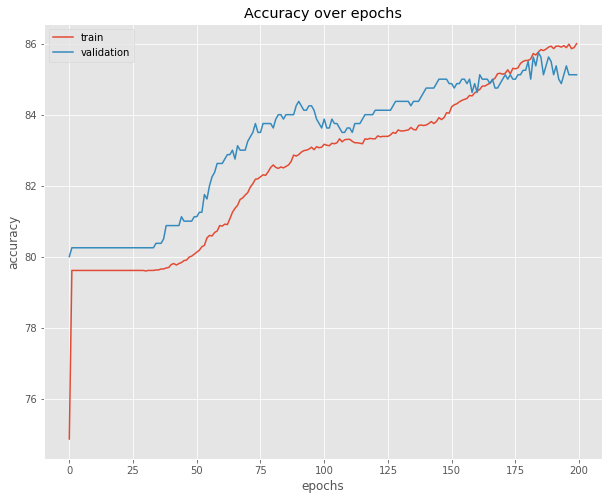

In [56]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

We can see that in some point the model begins to overfit the data. To improve the model I will use Grid Search Cross Validation.

In order to implement Random search CV in neural networks it is needed to create a function that generates a neural network architecture so that I can search over neural networks parameters: number of layers, number of networks per layer, learning rates, loss functiona and optimizer

In [57]:
def create_model( n_lay=1, n_neurons=10, learning_rate=0.01,optim='adam',act = 'relu', loss_f='binary_crossentropy',dropout=0.1, input_shape=X_train.shape[1], output_shape=1):#,b_size=100,ep=200
    if optim=='adam':
      opt = optimizers.Adam(lr=learning_rate)
    if optim=='SGD':
      opt = optimizers.SGD(lr=learning_rate)
    if optim=='ftrl':
      opt = optimizers.Ftrl(lr=learning_rate)
    
                                                        
    model = Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(n_lay): # I will create a NN with the same number of neurons in each layer
        if first:
            model.add(Dense(n_neurons, input_dim=input_shape, activation=act))
            first=False
        else: 
            model.add(Dense(n_neurons, activation=act))
        if dropout!=0:
            model.add(Dropout(dropout))
            
            
    model.add(Dense(output_shape, activation='sigmoid'))
    model.compile(loss=loss_f, optimizer=opt, metrics=['accuracy'])
    
    return model

I tried a lot of combination (and invested a lot of time on it) and I will put here only two options of each parameters in order to save time and show the idea of the excercise I did. 

In [43]:
# specify parameters to sample from

param_dist= {"n_lay":[2,3], 
             "n_neurons":[6,12],
             "learning_rate":[0.01,0.02],
             "optim":['adam','SGD'],
             "loss_f":['binary_crossentropy','CosineSimilarity'],
             "input_shape":[X_train.shape[1]],
             "output_shape": [1]}

model_grid = KerasClassifier(build_fn=create_model, epochs=50, batch_size=500, verbose=2)
# run randomized search
#grid = RandomizedSearchCV(estimator=model_grid,  param_distributions=param_dist,n_iter=5, n_jobs=1)
grid = GridSearchCV(estimator=model_grid,param_grid=param_dist, n_jobs=1)

grid_result = grid.fit(X_train, y_train)



Epoch 1/50
13/13 - 0s - loss: 0.5805 - accuracy: 0.7719
Epoch 2/50
13/13 - 0s - loss: 0.5105 - accuracy: 0.7928
Epoch 3/50
13/13 - 0s - loss: 0.4807 - accuracy: 0.7928
Epoch 4/50
13/13 - 0s - loss: 0.4623 - accuracy: 0.7928
Epoch 5/50
13/13 - 0s - loss: 0.4469 - accuracy: 0.7937
Epoch 6/50
13/13 - 0s - loss: 0.4346 - accuracy: 0.8023
Epoch 7/50
13/13 - 0s - loss: 0.4349 - accuracy: 0.8094
Epoch 8/50
13/13 - 0s - loss: 0.4262 - accuracy: 0.8102
Epoch 9/50
13/13 - 0s - loss: 0.4221 - accuracy: 0.8148
Epoch 10/50
13/13 - 0s - loss: 0.4209 - accuracy: 0.8180
Epoch 11/50
13/13 - 0s - loss: 0.4170 - accuracy: 0.8150
Epoch 12/50
13/13 - 0s - loss: 0.4145 - accuracy: 0.8164
Epoch 13/50
13/13 - 0s - loss: 0.4097 - accuracy: 0.8180
Epoch 14/50
13/13 - 0s - loss: 0.4089 - accuracy: 0.8178
Epoch 15/50
13/13 - 0s - loss: 0.4094 - accuracy: 0.8186
Epoch 16/50
13/13 - 0s - loss: 0.4091 - accuracy: 0.8192
Epoch 17/50
13/13 - 0s - loss: 0.4035 - accuracy: 0.8189
Epoch 18/50
13/13 - 0s - loss: 0.4056 - 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribu

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
13/13 - 0s - loss: 0.6416 - accuracy: 0.6636
Epoch 2/50
13/13 - 0s - loss: 0.5056 - accuracy: 0.7923
Epoch 3/50
13/13 - 0s - loss: 0.4640 - accuracy: 0.7928
Epoch 4/50
13/13 - 0s - loss: 0.4508 - accuracy: 0.7927
Epoch 5/50
13/13 - 0s - loss: 0.4391 - accuracy: 0.7931
Epoch 6/50
13/13 - 0s - loss: 0.4296 - accuracy: 0.8016
Epoch 7/50
13/13 - 0s - loss: 0.4235 - accuracy: 0.8100
Epoch 8/50
13/13 - 0s - loss: 0.4143 - accuracy: 0.8133
Epoch 9/50
13/13 - 0s - loss: 0.4111 - accuracy: 0.8156
Epoch 10/50
13/13 - 0s - loss: 0.4090 - accuracy: 0.8144
Epoch 11/50
13/13 - 0

The best parameters found in the search are:

In [44]:
print(grid.best_params_)

{'input_shape': 11, 'learning_rate': 0.02, 'loss_f': 'binary_crossentropy', 'n_lay': 2, 'n_neurons': 12, 'optim': 'adam', 'output_shape': 1}


Results of the searching

In [45]:
cv_results_df = pd.DataFrame(grid_result.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_input_shape,param_learning_rate,param_loss_f,param_n_lay,param_n_neurons,param_optim,param_output_shape,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.229699,0.104815,0.113809,0.001384,11,0.01,binary_crossentropy,2,6,adam,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.847500,0.846250,0.853125,0.868750,0.858125,0.854750,0.008183,6
1,2.066847,0.059246,0.115932,0.006287,11,0.01,binary_crossentropy,2,6,SGD,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.812500,0.789375,0.785000,0.807500,0.789375,0.796750,0.011050,14
2,2.286964,0.198681,0.116989,0.005413,11,0.01,binary_crossentropy,2,12,adam,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.867500,0.841875,0.860000,0.870625,0.851875,0.858375,0.010493,3
3,2.098541,0.057354,0.117787,0.004712,11,0.01,binary_crossentropy,2,12,SGD,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.812500,0.790000,0.786250,0.807500,0.789375,0.797125,0.010706,11
4,2.430599,0.124895,0.120639,0.006443,11,0.01,binary_crossentropy,3,6,adam,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.855000,0.841250,0.851250,0.881250,0.843750,0.854500,0.014265,7
5,2.277204,0.257351,0.122500,0.008718,11,0.01,binary_crossentropy,3,6,SGD,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.812500,0.789375,0.785625,0.807500,0.789375,0.796875,0.010919,13
6,2.381128,0.071256,0.122388,0.002989,11,0.01,binary_crossentropy,3,12,adam,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.855625,0.841875,0.855625,0.870625,0.855625,0.855875,0.009097,5
7,2.244805,0.047793,0.128421,0.009421,11,0.01,binary_crossentropy,3,12,SGD,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",0.812500,0.789375,0.785000,0.807500,0.789375,0.796750,0.011050,14
8,0.104401,0.004503,0.000000,0.000000,11,0.01,CosineSimilarity,2,6,adam,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,0.103037,0.004277,0.000000,0.000000,11,0.01,CosineSimilarity,2,6,SGD,1,"{'input_shape': 11, 'learning_rate': 0.01, 'lo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


Selection and fitting of the best model

In [47]:
best_model = grid_result.best_estimator_

In [50]:
history_best = best_model.fit(X_train, y_train, batch_size=100, epochs=100, validation_split=0.1, verbose=2)

Epoch 1/100
72/72 - 0s - loss: 0.4557 - accuracy: 0.7993 - val_loss: 0.4073 - val_accuracy: 0.8250
Epoch 2/100
72/72 - 0s - loss: 0.3977 - accuracy: 0.8317 - val_loss: 0.3610 - val_accuracy: 0.8637
Epoch 3/100
72/72 - 0s - loss: 0.3731 - accuracy: 0.8418 - val_loss: 0.3515 - val_accuracy: 0.8650
Epoch 4/100
72/72 - 0s - loss: 0.3662 - accuracy: 0.8489 - val_loss: 0.3485 - val_accuracy: 0.8600
Epoch 5/100
72/72 - 0s - loss: 0.3655 - accuracy: 0.8519 - val_loss: 0.3465 - val_accuracy: 0.8612
Epoch 6/100
72/72 - 0s - loss: 0.3613 - accuracy: 0.8539 - val_loss: 0.3604 - val_accuracy: 0.8650
Epoch 7/100
72/72 - 0s - loss: 0.3559 - accuracy: 0.8492 - val_loss: 0.3456 - val_accuracy: 0.8600
Epoch 8/100
72/72 - 0s - loss: 0.3578 - accuracy: 0.8528 - val_loss: 0.3529 - val_accuracy: 0.8600
Epoch 9/100
72/72 - 0s - loss: 0.3529 - accuracy: 0.8596 - val_loss: 0.3433 - val_accuracy: 0.8612
Epoch 10/100
72/72 - 0s - loss: 0.3500 - accuracy: 0.8561 - val_loss: 0.3374 - val_accuracy: 0.8625
Epoch 11/

7. **Predict the results using 0.5 as a threshold (10 points)**

Predicting results using both models and considering a threshold of 0.5

In [52]:
# Prediction with first model
y_pred_1st = model.predict(X_test)
y_pred_1st = (y_pred_1st > 0.5).astype(int)


In [53]:
# Prediction with best model
y_pred_best = best_model.predict(X_test)
y_pred_best = (y_pred_best > 0.5).astype(int)


4/4 - 0s


8. **Print the Accuracy score and confusion matrix (5 points)**

Printing and comparing the accuracy, matrix confusion, Recall, Precision and F-score for both models

In [58]:
cm_1st = confusion_matrix(y_test, y_pred_1st)
cm_best = confusion_matrix(y_test, y_pred_best)

print(cm_1st)
print(cm_best)

[[1522   67]
 [ 219  192]]
[[1506   83]
 [ 193  218]]


We can see that the last model performs and predicts more 1´s better

In [55]:
print('Accuracy 1st model: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score 1st model: ' + str(recall_score(y_test,y_pred_1st)))
print('Precision_score 1st model: ' + str(precision_score(y_test, y_pred_1st)))
print('F-score 1st model: ' + str(f1_score(y_test,y_pred_1st)))
print(confusion_matrix(y_test, y_pred_1st))

print()

print('Accuracy best model: '+ str(accuracy_score(y_test,y_pred_best)))
print('Recall_score best model: ' + str(recall_score(y_test,y_pred_best)))
print('Precision_score best model: ' + str(precision_score(y_test, y_pred_best)))
print('F-score best model: ' + str(f1_score(y_test,y_pred_best)))
print(confusion_matrix(y_test, y_pred_best))

63/63 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8570
Accuracy 1st model: 0.8569999933242798
Recall_score 1st model: 0.46715328467153283
Precision_score 1st model: 0.7413127413127413
F-score 1st model: 0.5731343283582089
[[1522   67]
 [ 219  192]]

Accuracy best model: 0.862
Recall_score best model: 0.5304136253041363
Precision_score best model: 0.7242524916943521
F-score best model: 0.6123595505617977
[[1506   83]
 [ 193  218]]


From the scores shown we can see that the optimization worked well. I can find a model with better scores.